The gender with highest number of winner is:  Male
The birth_country with highest number of winner is:  United States of America
The decade with the highest number of winner in usa is: 2000
The decade with the highest of female winners is: 2020 in Literature category


C:\Users\Mariam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


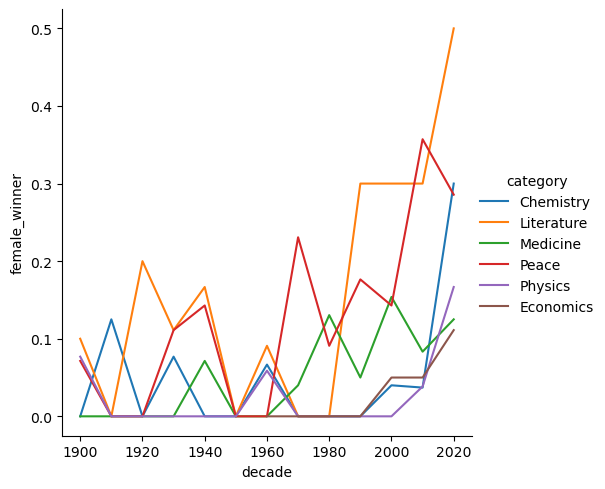

The first female to win a nobel price is: Aleksey Yekimov in Chemistry category
The individauls that won more than once are:  ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


In [54]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.
#Questions;
# Question one: Which gender has the highest number of winners?
#Question two: Which birth_country has the highest number of winners?
#Question three: In which decade did the United States of America have the highest proportion of Nobel Prize winners?
#Question four: In which decade and category did female Nobel Prize winners have the highest proportion of winners?
#Question 4a: Using visualization, how does the proportion of female Nobel Prize winners vary across decades and categories
#Question 5: Who was the first female Nobel Prize winner, and in which category did she win?
#Question 6: Which individuals have won the Nobel Prize more than once?

#Solution
#import the csv file as nobel
nobel = pd.read_csv('nobel.csv')
#Read the first few rows of the file
#print(nobel.head())
#Answer to question 1:
top_gender = nobel['sex'].value_counts().index[0]
print('The gender with highest number of winner is: ', top_gender)

#Answer to question 2:
top_birth_country = nobel['birth_country'].value_counts().index[0]
print('The birth_country with highest number of winner is: ', top_birth_country)

#Answer to question 3:
#subset birth_country that is equal to USA to the new col
nobel['usa'] = nobel['birth_country'] == 'United States of America'
#Create a new col to calc the decade from year col
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
#Calc the ratio of decade to Usa.mean which convert the boolean values of the usa col to nums
ratio = nobel.groupby('decade', as_index=False)['usa'].mean()
#Filter the usa mean with the highest value
max_ratio = ratio[ratio['usa'] == ratio['usa'].max()]
#Filter for only the decade col
max_decade_usa = max_ratio['decade'].values[0]
print('The decade with the highest number of winner in usa is:', max_decade_usa)

#Ans to quest 4
#Create a new col for sex col where female is true 
nobel['female_winner'] = nobel['sex'] == 'Female'
#Do the same thing that was done in ans 3
female_dec_cat = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
max_female = female_dec_cat[female_dec_cat['female_winner'] == female_dec_cat['female_winner'].max()]
max_female_cat = max_female[['decade','category']]
print('The decade with the highest of female winners is:', max_female_cat['decade'].values[0],'in',max_female_cat['category'].values[0],'category')

#ans to 4a
sns.relplot(x="decade",y="female_winner",data=nobel,kind="line",hue="category",ci=None)
plt.show()
#Answer to question 5
name_cat = nobel.groupby(['full_name','category'],as_index=False)['year'].mean()
max_name_cat = name_cat[name_cat['year'] == name_cat['year'].max()]
max_name_cat = max_name_cat[['full_name','category']]
print('The first female to win a nobel price is:', max_name_cat['full_name'].values[0], 'in', max_name_cat['category'].values[0],'category')

#Answer to question 6
counts = nobel['full_name'].value_counts()
counts_col = counts[counts>=2].index
repeat_list= list(counts_col)
print('The individauls that won more than once are: ', repeat_list)

